### Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plot visibility
# sns.set(style="whitegrid")
# plt.style.use('seaborn-poster')


In [5]:
# Load your cleaned dataset
file_path = '../Data/cleaned_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018.0,Second,84-436-5584,52798.0,759107.0,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020.0,Third,79-114-3166,43412.0,505071.0,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,Sunroof
2,Kia,Accord,RXE,Petrol,New,2022.0,Second,41-358-3344,95219.0,635322.0,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,Sunroof
3,Nissan,Seltos,Highline,Diesel,Used,2024.0,Third,92-708-1763,70370.0,483152.0,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018.0,Second,76-154-5485,85852.0,712961.0,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


         Make Year        Mileage          Price
count  2500.000000    2500.000000    2500.000000
mean   2019.521600  104777.792000  608120.897600
std       2.894146   55544.487467  231056.126713
min    2015.000000   10010.000000  200176.000000
25%    2017.000000   56313.000000  407791.000000
50%    2020.000000  104209.500000  612012.500000
75%    2022.000000  152149.250000  804567.000000
max    2024.000000  199755.000000  999826.000000


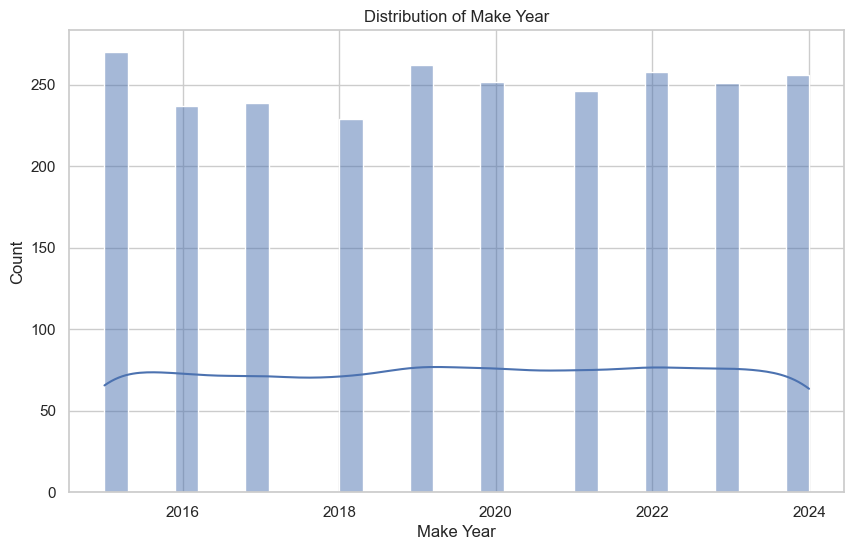

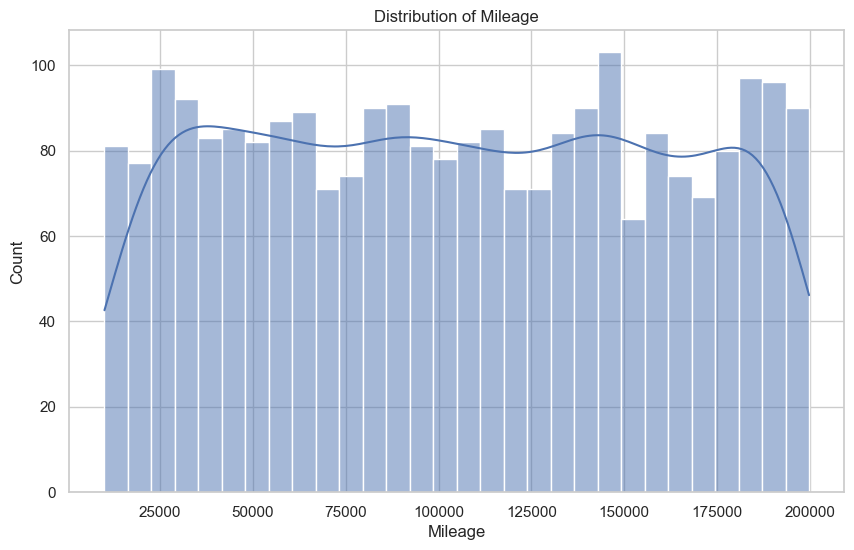

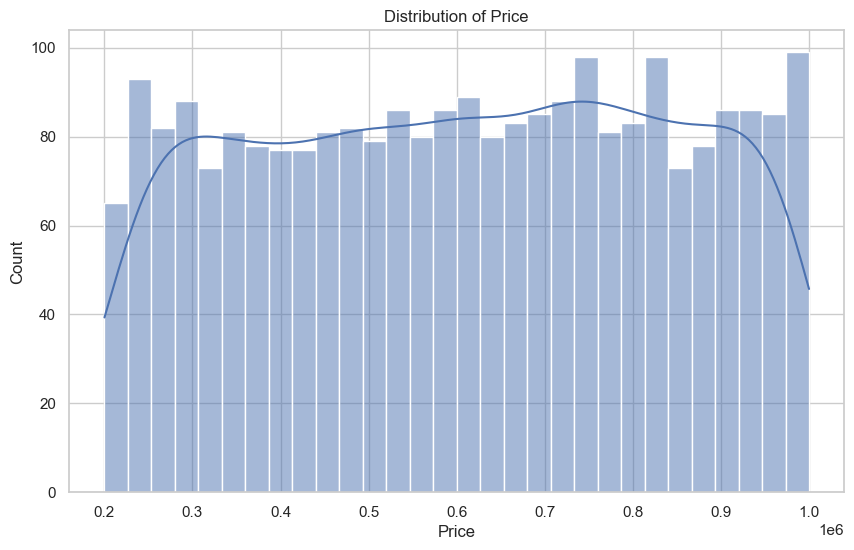

In [6]:
# Summary statistics for numerical columns
print(df.describe())

# Distribution plots for numerical columns
numeric_cols = ['Make Year', 'Mileage', 'Price']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


## Analyzing Categorical variables

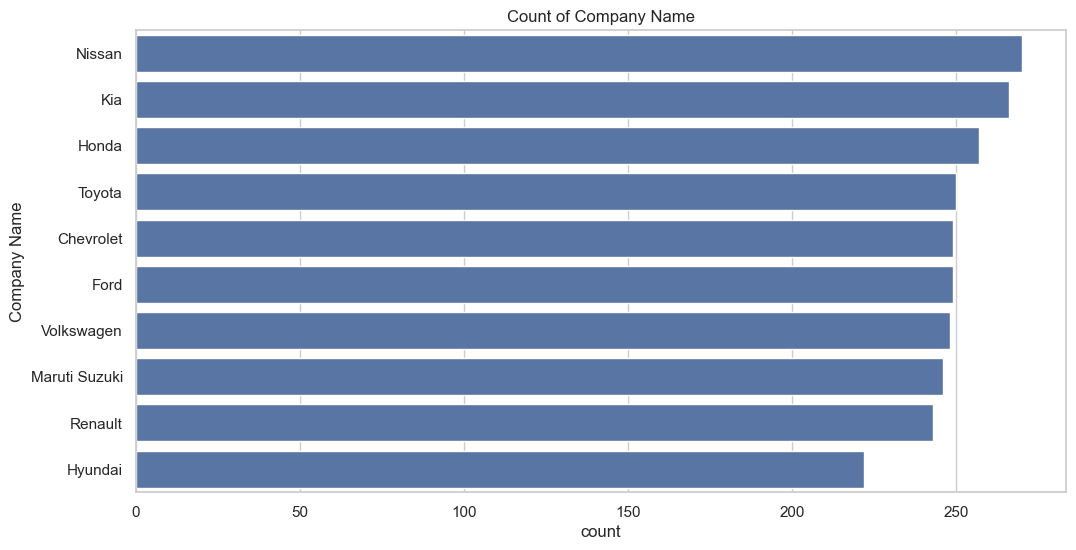

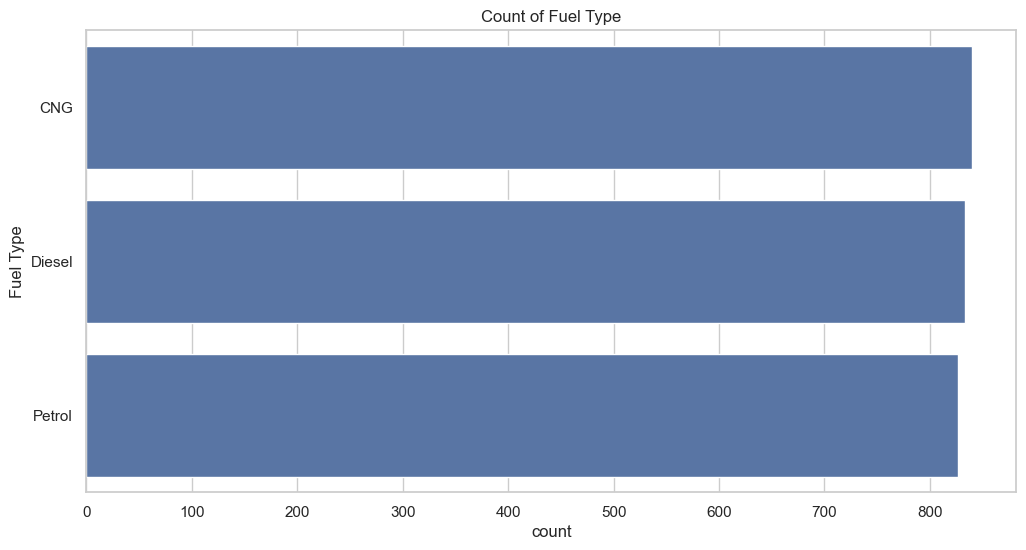

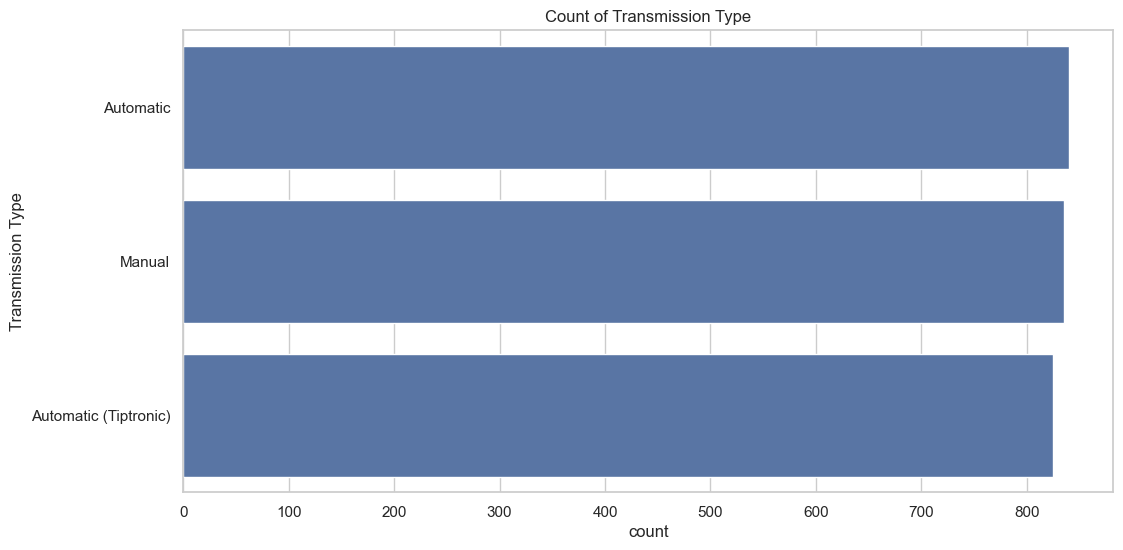

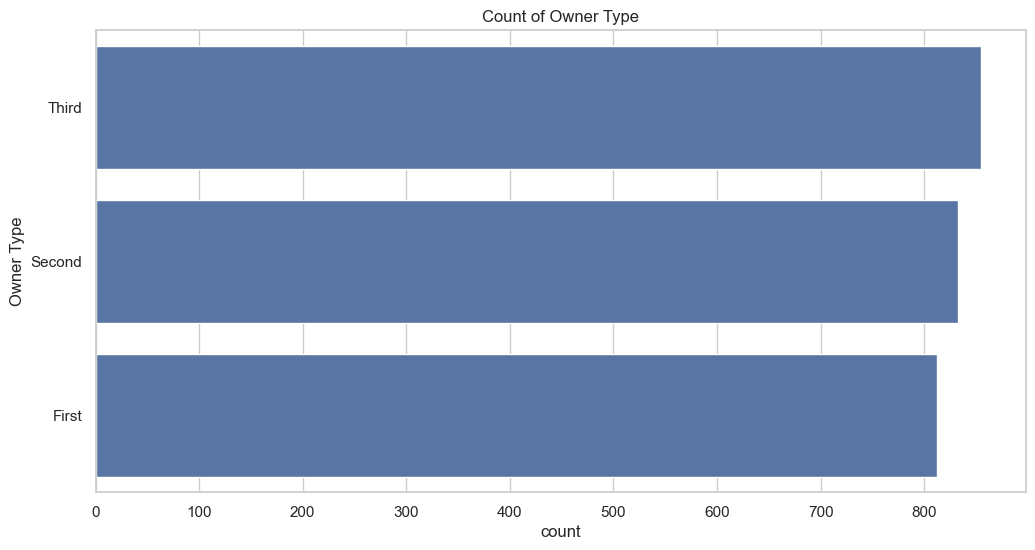

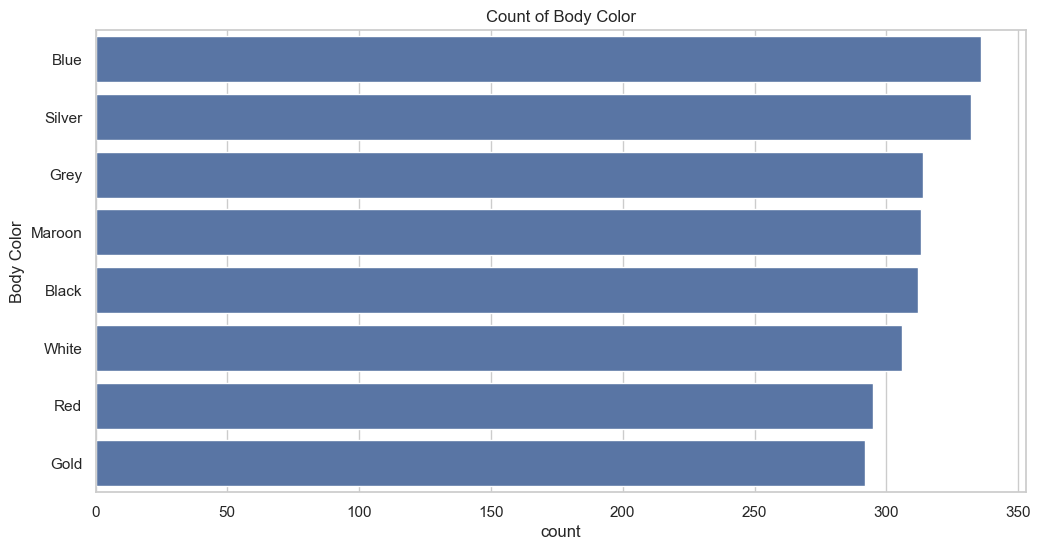

In [7]:
# Count plots for categorical columns
categorical_cols = ['Company Name', 'Fuel Type', 'Transmission Type', 'Owner Type', 'Body Color']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()


## Bivariate Analysis

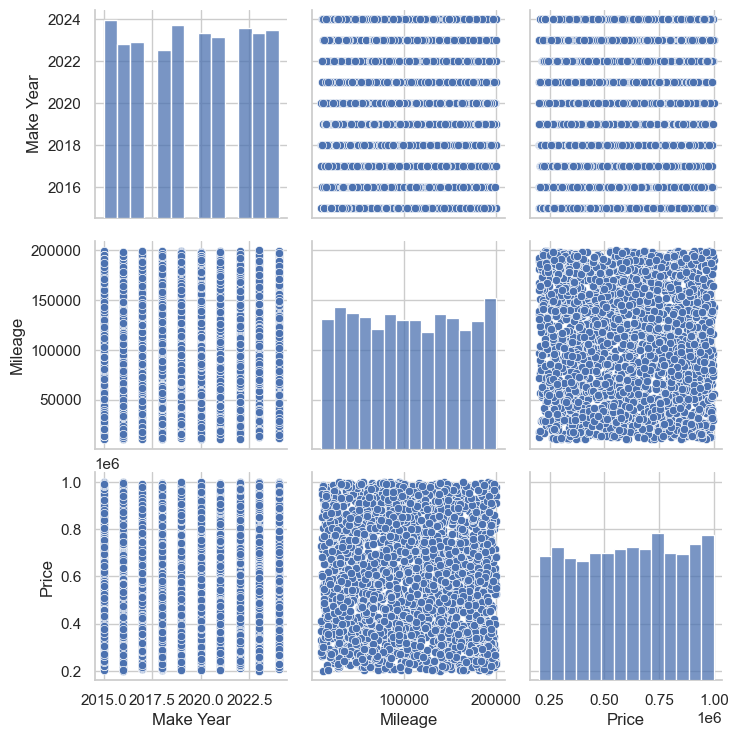

In [8]:
# Pairplot for numerical columns
sns.pairplot(df[numeric_cols], height=2.5)
plt.show()


## Analyzing categorical vs Numerical variables

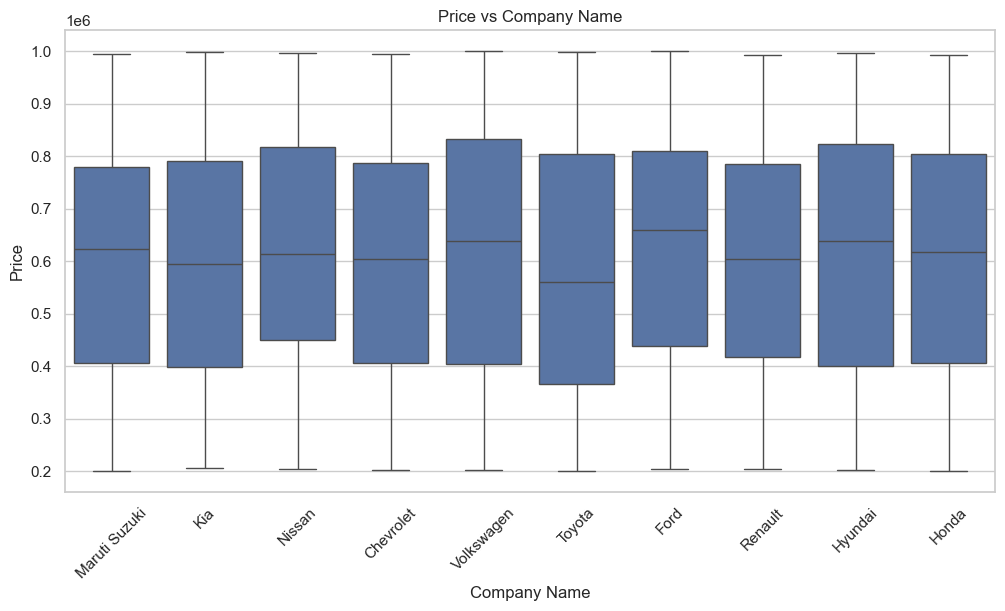

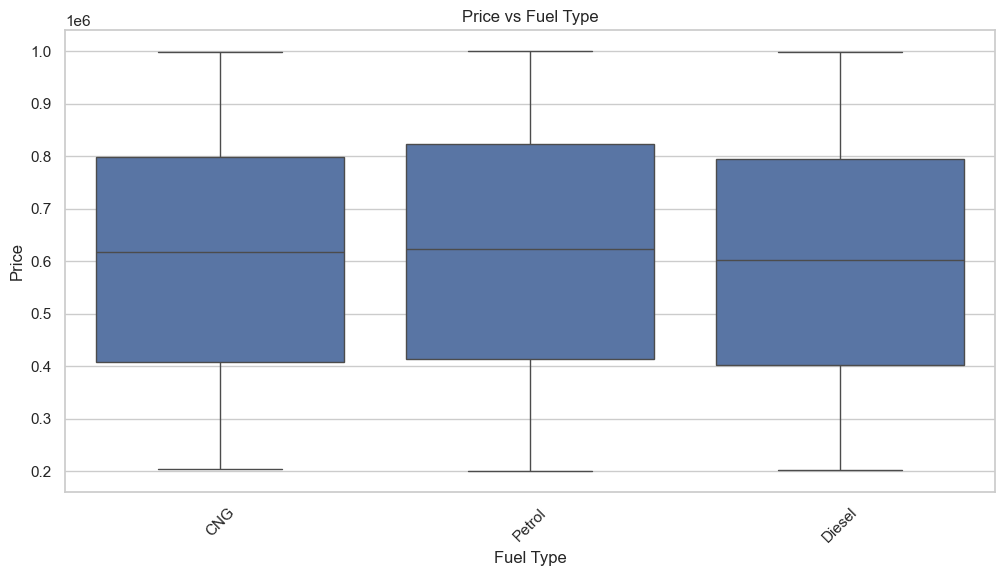

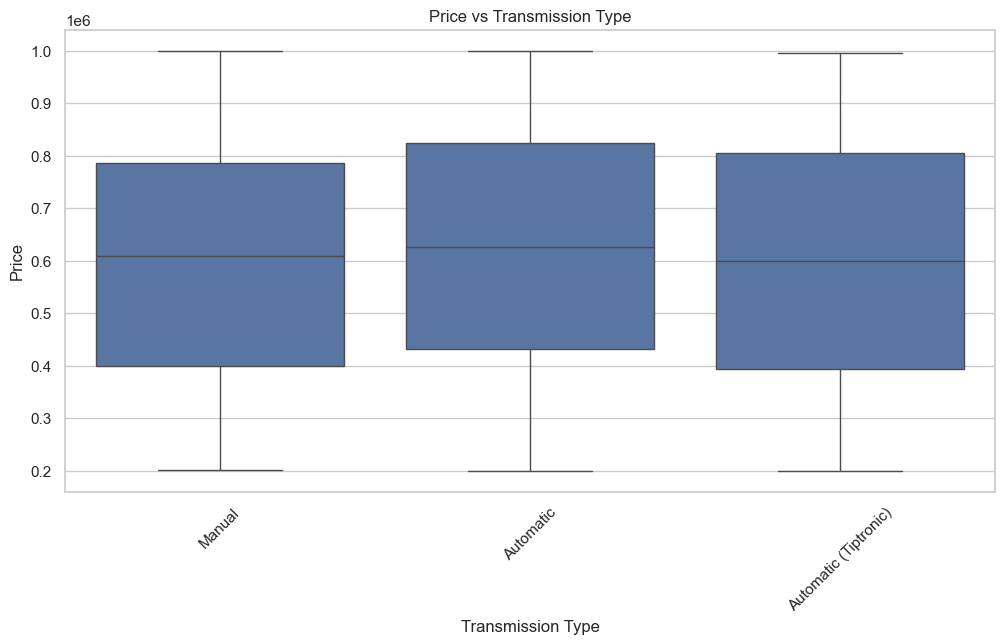

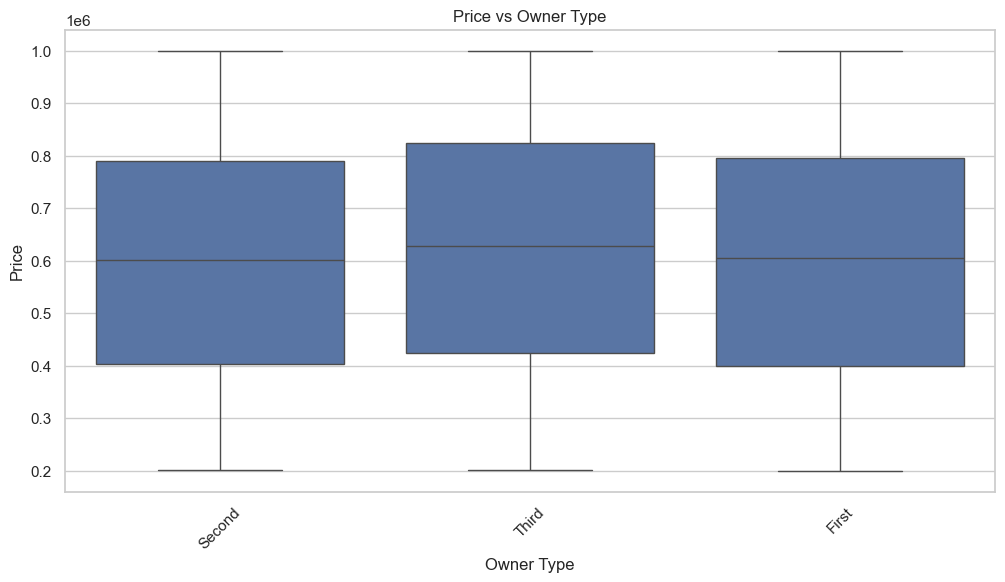

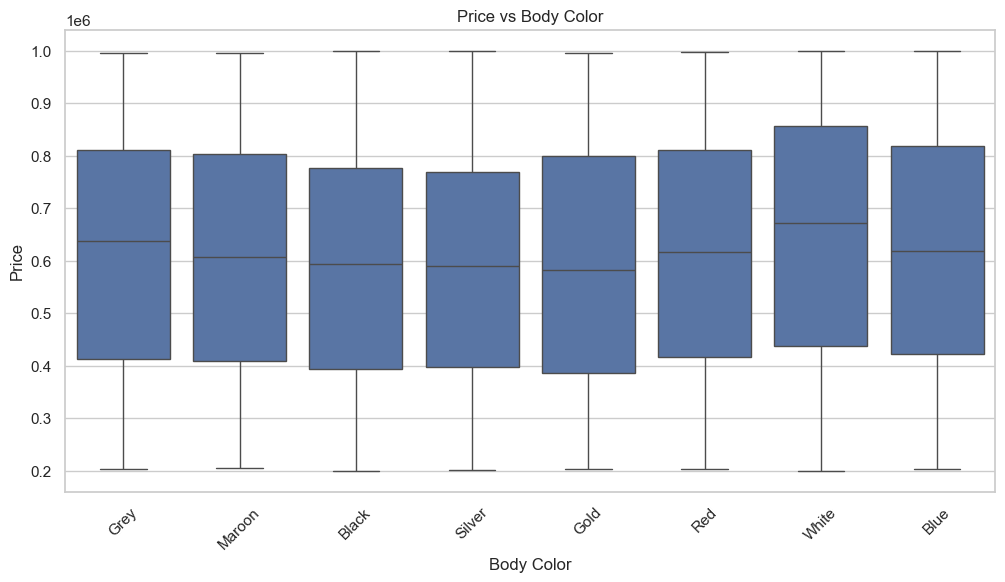

In [9]:
# Boxplot of Price vs Categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()


### Correlation Analysis

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Maruti Suzuki'

<Figure size 1000x800 with 0 Axes>

### Multivariable Analysis

#### Analyzing the interaction beteen Categorical and Numerical columns

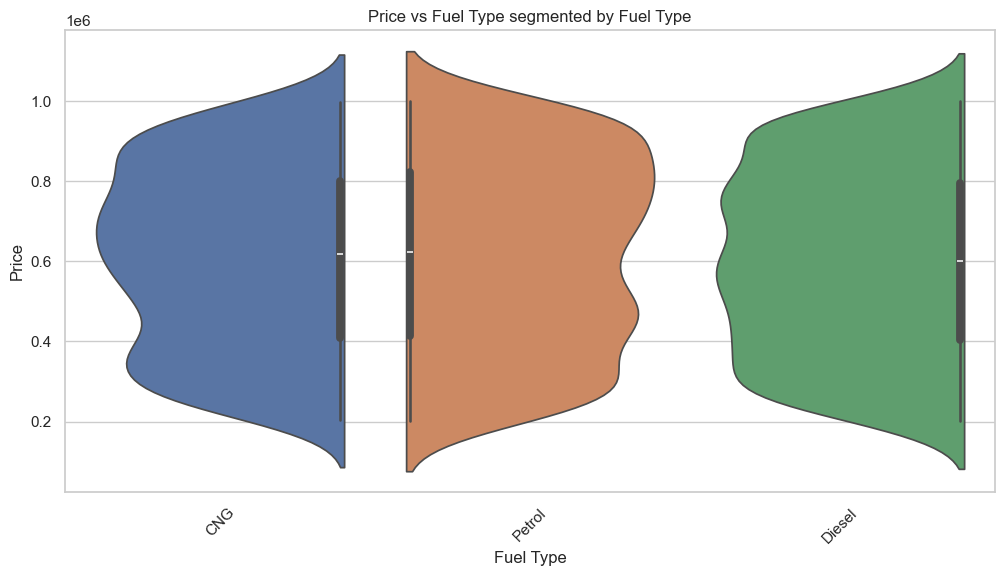

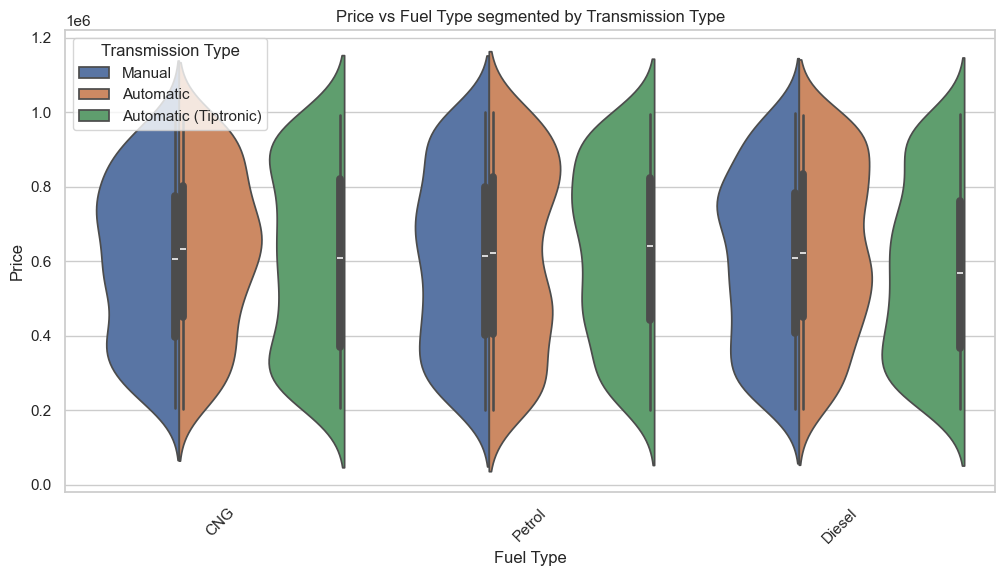

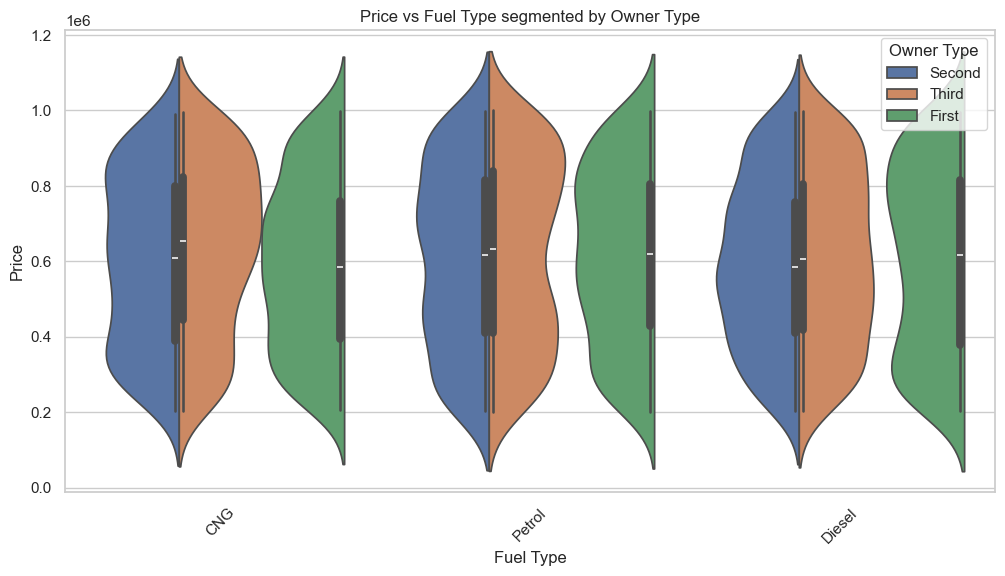

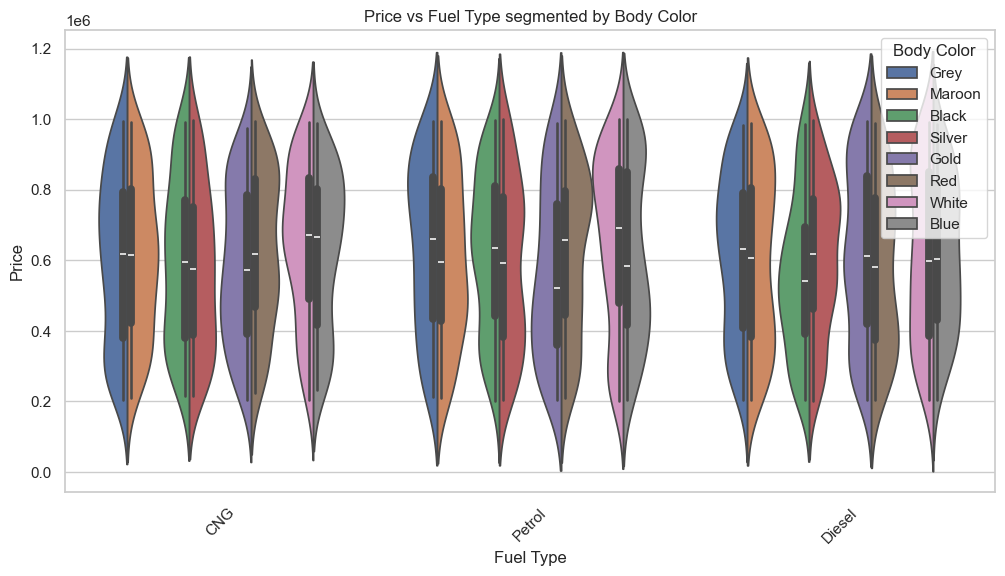

In [11]:
# Violin plots for Price across different categorical columns, segmented by another category
for col in categorical_cols:
    if col != 'Company Name':
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=df['Fuel Type'], y=df['Price'], hue=df[col], split=True)
        plt.title(f'Price vs Fuel Type segmented by {col}')
        plt.xticks(rotation=45)
        plt.show()


#### Heatmap of the categorical data with numerical Data

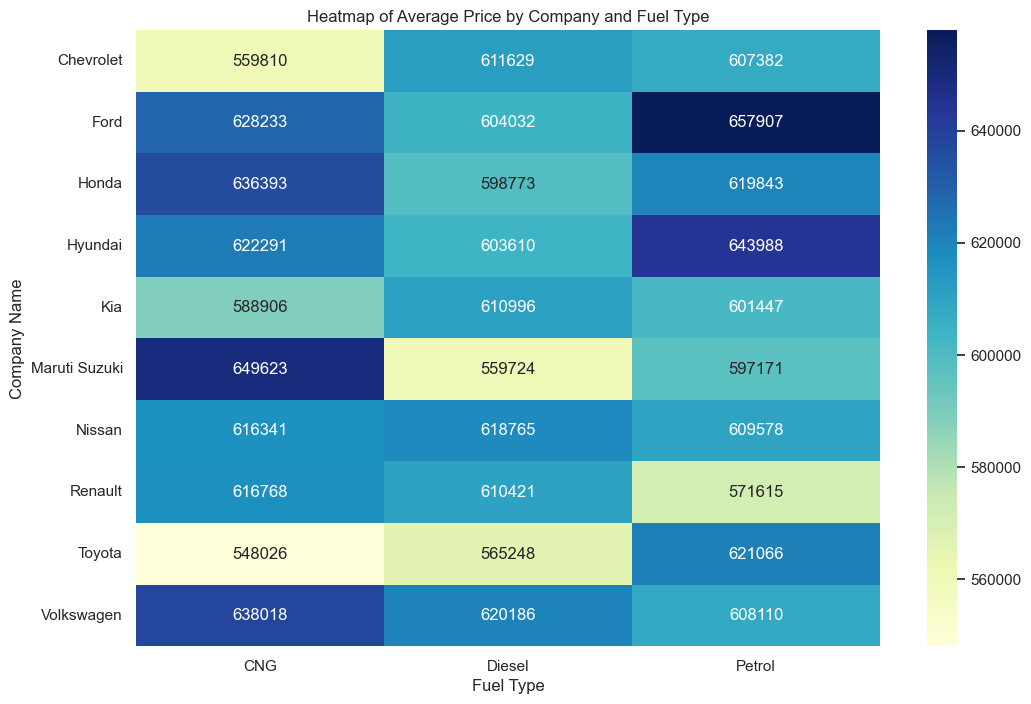

In [12]:
# Cross-tabulation (pivot table) of categorical columns vs numerical data
pivot_table = pd.pivot_table(df, values='Price', index='Company Name', columns='Fuel Type', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap of Average Price by Company and Fuel Type')
plt.show()


In [13]:
# Summary of findings
print("EDA Summary:")
print("1. Distribution insights: Price distribution is right-skewed; most cars are within the lower price range.")
print("2. Correlation insights: Mileage and Price show a moderate negative correlation.")
print("3. Category analysis: Certain brands dominate specific segments in terms of Fuel Type and Transmission Type.")
print("4. Multivariate insights: Luxury car brands tend to have higher prices, especially for automatic and petrol cars.")



EDA Summary:
1. Distribution insights: Price distribution is right-skewed; most cars are within the lower price range.
2. Correlation insights: Mileage and Price show a moderate negative correlation.
3. Category analysis: Certain brands dominate specific segments in terms of Fuel Type and Transmission Type.
4. Multivariate insights: Luxury car brands tend to have higher prices, especially for automatic and petrol cars.
